In [ ]:
# importing required libraries and modules
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
# loding dataset
(train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()

# normalizing data
train_labels = train_labels[:50000]
train_images = train_images[:50000].reshape(-1, 28 * 28) / 255.0

11490434/11490434 [==============================] - 0s 0us/step


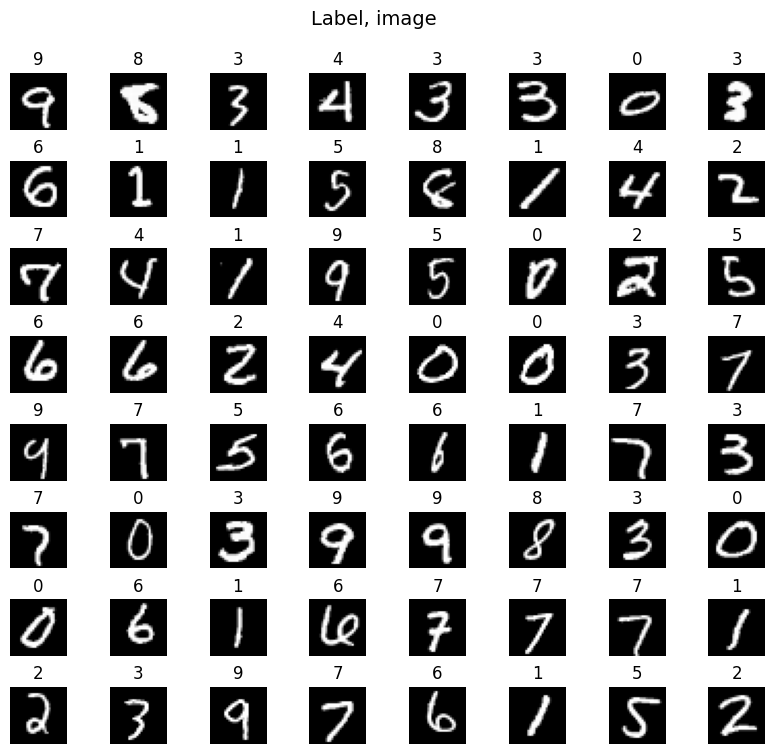

In [ ]:
# visualizing data
m, n = train_images.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = train_images[random_index].reshape((28,28))

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(train_labels[random_index])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [ ]:
# defining neural network
model = Sequential(
    [
        tf.keras.Input(shape=(784,)), # input of 28x28 image
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(10, activation='linear') # output layer with 10 output units
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# defining the loss function
model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer = Adam(learning_rate=0.001),
)
# training neural network
history = model.fit(
    train_images,train_labels,
    epochs=10
)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4178
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2157
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1754
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1504
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1354
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1233
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1133
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1072
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0983
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0927


Text(0, 0.5, 'loss')

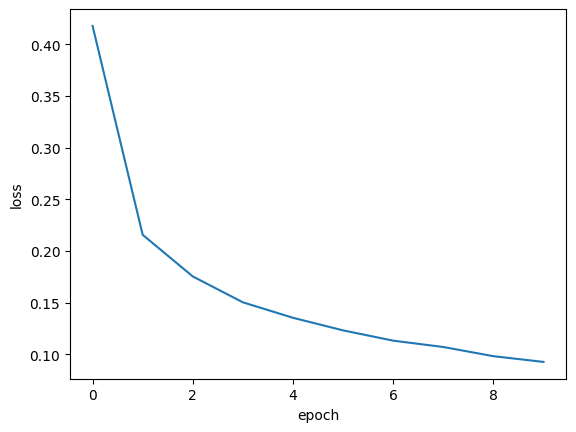

In [ ]:
# plotting learning curve
plt.plot(history.history['loss'], label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')

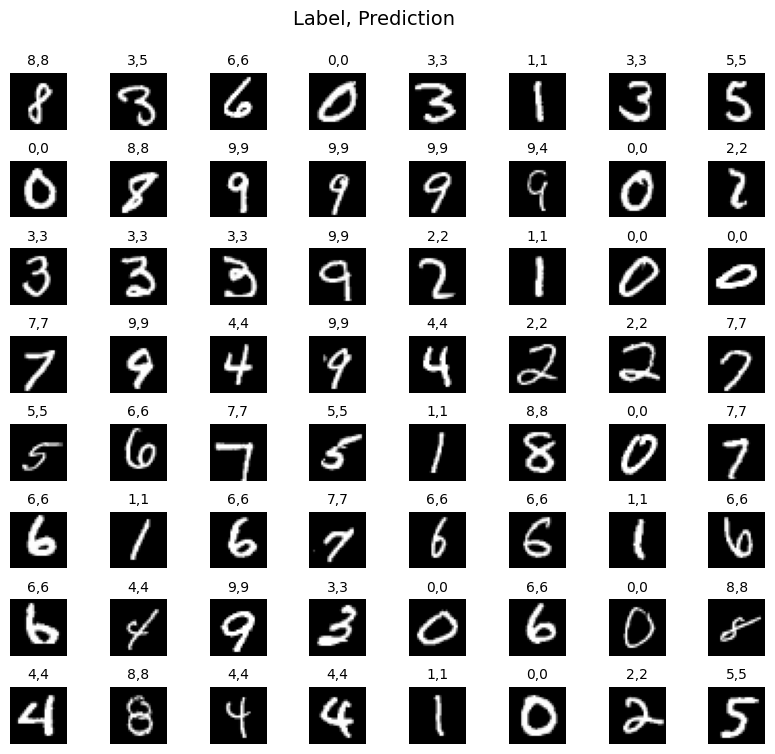

In [ ]:
# visualizing predections
fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = train_images[random_index].reshape((28,28))

    # Display the image

    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(train_images[random_index].reshape(1,784), verbose = 0)
    prediction_p = tf.nn.softmax(prediction)
    p = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{train_labels[random_index]},{p}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, Prediction", fontsize=14)
plt.show()